In [1]:
from pywarpx import picmi
import yt
from yt import derived_field
yt.enable_parallelism()

# %%
@derived_field(name="density_e", sampling_type="local",display_name=r"\rho_e")
def _density_e(field, data):
    return data['boxlib','rho_e-']/ -picmi.constants.q_e

@derived_field(name="density_p", sampling_type="local")
def _density_p(field, data):
    return data['boxlib','rho_p+']/picmi.constants.q_e

@derived_field(name="density", sampling_type="local")
def _density(field, data):
    return data['boxlib','rho_p+']/picmi.constants.q_e + data['boxlib','rho_e-']/picmi.constants.q_e

In [2]:
diag_name = 'plt'
plotfile = './diags/plotfiles/{}??????'.format(diag_name)
ts = yt.load(plotfile)
ds = ts[0]

yt : [INFO     ] 2022-05-19 11:50:24,917 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-19 11:50:24,918 Parameters: domain_dimensions         = [128 256   1]
yt : [INFO     ] 2022-05-19 11:50:24,918 Parameters: domain_left_edge          = [     0.         -63647.09434703      0.        ]
yt : [INFO     ] 2022-05-19 11:50:24,919 Parameters: domain_right_edge         = [6.36470943e+04 6.36470943e+04 1.00000000e+00]


yt : [INFO     ] 2022-05-19 11:50:28,062 xlim = 0.000000 63647.094347
yt : [INFO     ] 2022-05-19 11:50:28,063 ylim = -63647.094347 63647.094347
yt : [INFO     ] 2022-05-19 11:50:28,064 xlim = 0.000000 63647.094347
yt : [INFO     ] 2022-05-19 11:50:28,064 ylim = -63647.094347 63647.094347
yt : [INFO     ] 2022-05-19 11:50:28,065 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2022-05-19 11:50:28,081 Making a fixed resolution buffer of (('gas', 'density_e')) 800 by 800
yt : [INFO     ] 2022-05-19 11:50:28,088 Making a fixed resolution buffer of (('gas', 'density_p')) 800 by 800
yt : [WARNING  ] 2022-05-19 11:50:28,114 Plotting ('gas', 'density'): Both positive and negative values. Min = -62999.54663490444 dimensionless, Max = 79178.23628314245 dimensionless.
yt : [WARNING  ] 2022-05-19 11:50:28,114 Switching to symlog colorbar scaling.
yt : [WARNING  ] 2022-05-19 11:50:28,287 Plotting ('gas', 'density_p'): Both positive and negative values. Min = 0.0


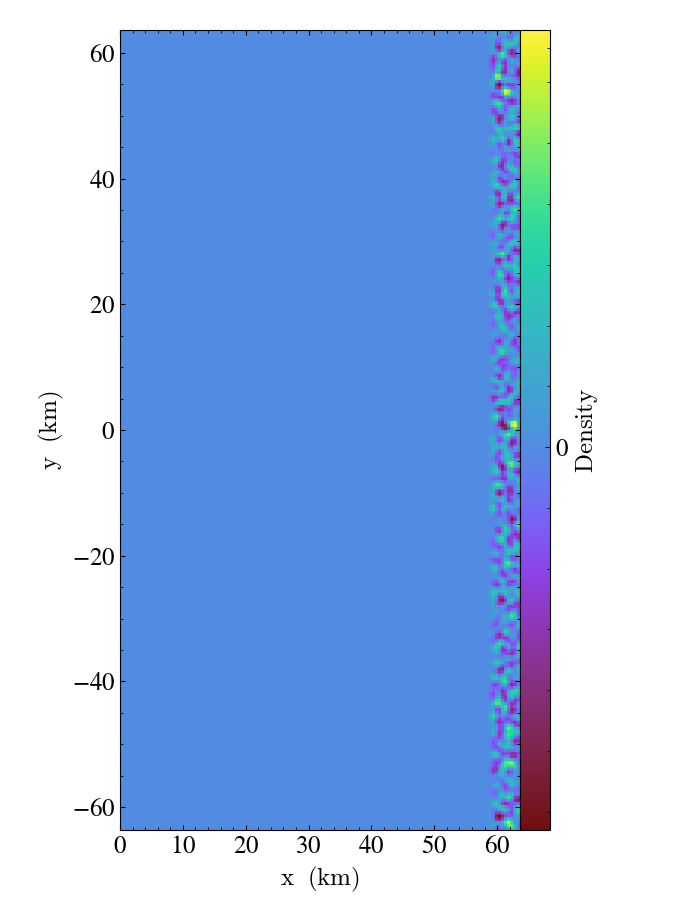
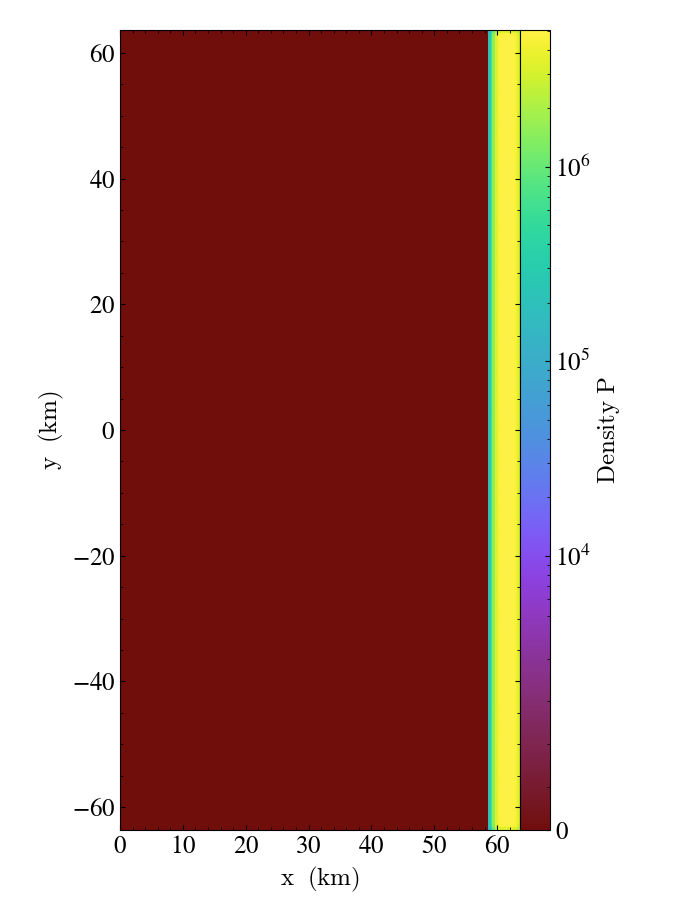
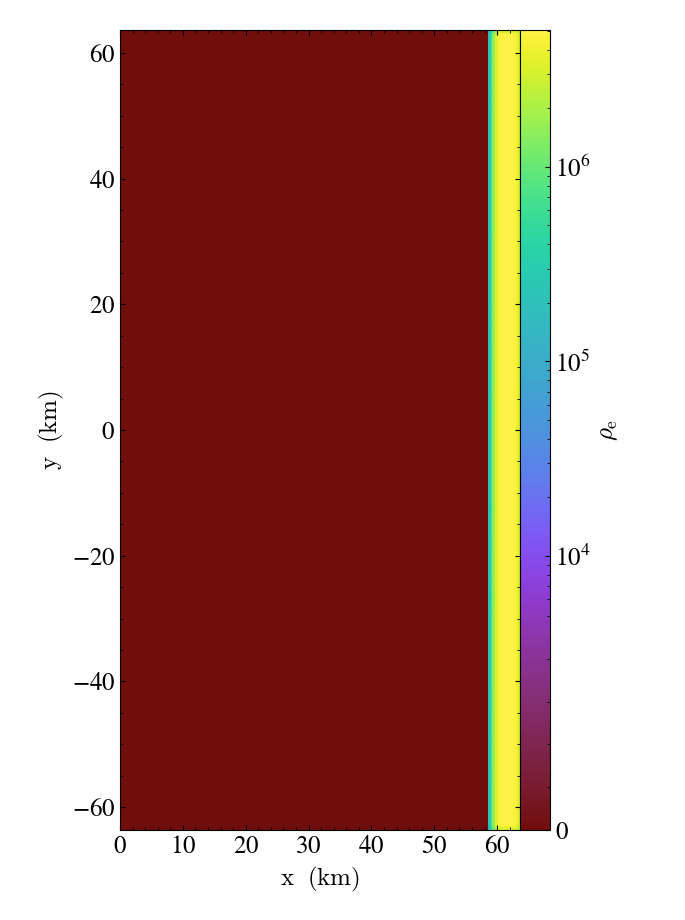

In [3]:
slc = yt.SlicePlot(ds, "z", [('gas', 'density_e'),('gas', 'density_p') ,('gas', 'density') ] ,origin="native")
slc.show()

In [1]:
from pywarpx import picmi
import yt
yt.enable_parallelism()

def _density_e(field, data):
    from pywarpx import picmi
    q_e = picmi.constants.q_e
    
    return - data['boxlib','rho_e-']/q_e

yt.add_field(
    "density_e",
    function=_density_e,
    sampling_type="local",
)

# %%
diag_name = 'plt'
plotfile = './diags/plotfiles/{}??????'.format(diag_name)
ts = yt.load(plotfile)

from pathlib import Path

subdirectories = ["figures"]
for path in subdirectories:
    Path(path).mkdir(parents=True, exist_ok=True)

# %%
_check = 1
if _check:
    from icecream import ic
    ds = ts[0]
    ic(ds.time_unit)
    ic(ds.current_time)
    ic(ds.derived_field_list)

yt : [INFO     ] 2022-05-19 11:25:33,156 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-19 11:25:33,157 Parameters: domain_dimensions         = [128 256   1]
yt : [INFO     ] 2022-05-19 11:25:33,158 Parameters: domain_left_edge          = [     0.         -63647.09434703      0.        ]
yt : [INFO     ] 2022-05-19 11:25:33,158 Parameters: domain_right_edge         = [6.36470943e+04 6.36470943e+04 1.00000000e+00]
ic| ds.time_unit: unyt_quantity(1., 's')
ic| ds.current_time: unyt_quantity(0., 'code_time')
ic| ds.derived_field_list: [('all', 'particle_cpu'),
                            ('all', 'particle_id'),
                            ('all', 'particle_momentum_x'),
                            ('all', 'particle_momentum_y'),
                            ('all', 'particle_momentum_z'),
                            ('all', 'particle_position_x'),
                            ('all', 'particle_position_y'),
                            ('all', 'particle_weight'),
       